In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

epoch = 0 , cost = 2.00592875 , w1 = 1.44142735 , w2 = -2.08124113 , ... b = -1.30549574 , accuracy = 0.34519104
epoch = 500 , cost = 0.60509074 , w1 = 0.61242998 , w2 = -1.91930401 , ... b = 0.23071510 , accuracy = 0.68906456
epoch = 1000 , cost = 0.56674874 , w1 = 0.39514685 , w2 = -1.98830795 , ... b = 0.42703378 , accuracy = 0.69960474
epoch = 1500 , cost = 0.55251181 , w1 = 0.26299027 , w2 = -2.08744574 , ... b = 0.45835608 , accuracy = 0.71541502
epoch = 2000 , cost = 0.54122216 , w1 = 0.15280376 , w2 = -2.18259740 , ... b = 0.46672672 , accuracy = 0.72068511
epoch = 2500 , cost = 0.53199571 , w1 = 0.05516855 , w2 = -2.27006173 , ... b = 0.47117731 , accuracy = 0.72990777
epoch = 3000 , cost = 0.52440947 , w1 = -0.03226331 , w2 = -2.35025287 , ... b = 0.47442684 , accuracy = 0.72859025
epoch = 3500 , cost = 0.51813310 , w1 = -0.11074348 , w2 = -2.42401457 , ... b = 0.47688428 , accuracy = 0.73122530
epoch = 4000 , cost = 0.51290572 , w1 = -0.18127115 , w2 = -2.49211621 , ... b = 

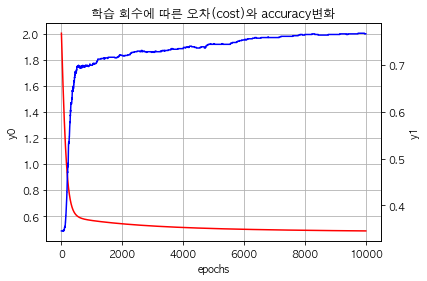

w =  [[-0.64383453]
 [-3.02845   ]
 [-1.1914266 ]
 [-0.6710894 ]
 [-0.32326433]
 [-0.87853855]
 [-0.9294533 ]
 [-0.03330056]]
b =  0.46427366
Accuracy =  0.766798418972332


In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

xy = np.loadtxt("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/data-03-diabetes.csv" , delimiter = "," , dtype = np.float32)

x_data = xy[: , 0:-1]
y_data = xy[: , [-1]]

# X = tf.placeholder(tf.float32 , shape = [None , 8])
# Y = tf.placeholder(tf.float32 , shape = [None , 1])

w = tf.Variable(tf.random.normal([8,1]) , name = "weight")
b = tf.Variable(tf.random.normal([1]) , name = "bias")

def hypothesis(w ,b):
    return tf.sigmoid(tf.matmul(x_data , w) + b)

def costFunc():
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(w,b)) + (1 - y_data) * tf.math.log(1 - hypothesis(w,b)))

def cost(w , b):
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(w,b)) + (1 - y_data) * tf.math.log(1 - hypothesis(w,b)))

def graph():
    fig , ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("학습 회수에 따른 오차(cost)와 accuracy변화")
    ax0.plot(cost_arr , "r-" , label = "y0")
    ax0.set_ylabel("y0")
    ax0.grid(True)
    ax1.plot(accuracy_arr , "b" , label = "y1")
    ax1.set_ylabel("y1")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()
    
opt = tf.keras.optimizers.SGD(learning_rate = 0.01)
epoch_arr = []
cost_arr = []
accuracy_arr = []

for step in range(10001):
    opt.minimize(costFunc , var_list = [w,b])
    predicted = tf.cast(hypothesis(w, b) > 0.5 , dtype = tf.float64)
    epoch_arr.append(step)
    cost_arr.append(cost(w,b).numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)
    if step % 500 == 0:
        print("epoch = %d , cost = %.8f , w1 = %.8f , w2 = %.8f , ... b = %.8f , accuracy = %.8f" %(step , cost(w,b) , w.numpy()[0,0] , w.numpy()[1,0] , b.numpy()[0] , accuracy))
        
graph()
print("=================================================")
print("w = " , w.numpy())
print("b = " , b.numpy()[0])

predicted = tf.cast(hypothesis(w,b) > 0.5 , dtype = tf.float64)
accuracy = np.mean(y_data == predicted)

print("Accuracy = " , accuracy)


# 신경망의 이해

퍼셉트론 

신경망을 이루는 가장 중요한 기본 단위는 퍼셉트론 
퍼셉트론은 입력 값과 활성화 함수를 사용해 출력값을 넘김 

기울기 a는 퍼셉트론에서는 가중치를 의미하는 w 로 표기됨
y절편 b는 똑같이 b라고 씀 , 하지만 y = a * x + b의 b가 아니라 편향 ,선입견이라는 의미로 사용 

가중합 = 입력값과 가중치의 곱을 모두 더한 다음 거기에 바이어스를 더한 값

가중합의 결과를 놓고 1 , 0을 출력해서 다음으로 보냄

0과 1을 판단하는 함수 = 활성화 함수 

tensorflow를 사용하여 코딩으로 확인하는 XOR문제

In [34]:
import tensorflow as tf
import numpy as np

learning_rate = 0.01
tf.random.set_seed(0)
np.random.seed(0)

x_data = np.array([[0,0] , [0,1] , [1,0] , [1,1]] , dtype = np.float32)
y_data = np.array([[0] , [1] , [1] , [0]] , dtype = np.float32)

w1 = tf.Variable(tf.random.normal([2,2]) , name = "weight1")
b1 = tf.Variable(tf.random.normal([2]) , name = "bias1")
w2 = tf.Variable(tf.random.normal([2,1]) , name = "weight2")
b2 = tf.Variable(tf.random.normal([1]) , name = "bias2")

def hypothesis():
    layer1 = tf.sigmoid(tf.matmul(x_data , w1) + b1)
    cost = tf.sigmoid(tf.matmul(layer1 , w2) + b2)
    return cost
def costFunc():
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis()) + (1 - y_data) * tf.math.log(1 - hypothesis()))

train = tf.keras.optimizers.SGD(learning_rate)
for step in range(30001):
    train.minimize(costFunc , var_list = [w1 , b1 , w2 , b2])
    predicted = tf.cast(hypothesis() > 0.5 , dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted ,y_data) , dtype = tf.float32))
    if step % 500 == 0:
        print(f"epoch = {step} , cost = {costFunc()} , accuracy = {accuracy}")
        
print("\nHypothesis : " , hypothesis().numpy , "\nCorrect : " , predicted.numpy() , "\nAccuracy : " , accuracy.numpy())

epoch = 0 , cost = 0.6908656358718872 , accuracy = 0.25
epoch = 500 , cost = 0.6834660768508911 , accuracy = 0.5
epoch = 1000 , cost = 0.6799909472465515 , accuracy = 0.5
epoch = 1500 , cost = 0.6764472126960754 , accuracy = 0.5
epoch = 2000 , cost = 0.6727514863014221 , accuracy = 0.5
epoch = 2500 , cost = 0.6688489317893982 , accuracy = 0.5
epoch = 3000 , cost = 0.664689302444458 , accuracy = 0.5
epoch = 3500 , cost = 0.6602303981781006 , accuracy = 0.75
epoch = 4000 , cost = 0.655439555644989 , accuracy = 0.75
epoch = 4500 , cost = 0.6502940654754639 , accuracy = 0.75
epoch = 5000 , cost = 0.6447793245315552 , accuracy = 0.75
epoch = 5500 , cost = 0.6388876438140869 , accuracy = 0.75
epoch = 6000 , cost = 0.63261479139328 , accuracy = 0.75
epoch = 6500 , cost = 0.6259578466415405 , accuracy = 0.75
epoch = 7000 , cost = 0.6189091801643372 , accuracy = 0.75
epoch = 7500 , cost = 0.6114570498466492 , accuracy = 0.75
epoch = 8000 , cost = 0.6035792827606201 , accuracy = 0.75
epoch = 850